Problem:

Based on an NBA player's rookie statistics, can we predict if that player will play in the NBA for at least five years?
Using historical data of rookie stats for players who did and did not play for five years, we can apply the differences between those two groups to the young players who have not yet been in the NBA for five years. This will help us predict whether a player has the potential to play in the NBA for at least five years, and from an organization's standpoint, if it is worth investing in that player.

In [136]:
#import necessary python packages

import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# read files
# a is the data of rookies by year
# b is the data of rookies and whether they have played for 5 years or not (players who have not yet played for 5 years will have a default value of 0)
# join the two dataframes, drop the repeating columns that were required by suffixes. rename columns that were overlapped.
# it is important to note that some of the data cleaning was done using OpenRefine

a = pd.read_csv('C:/Users/jconn/Desktop/basketball_data/NBA_Rookies_by_Year-this-is-a-test.csv', index_col=False, skiprows=0)
b = pd.read_csv('C:/Users/jconn/Desktop/basketball_data/nba_logreg_target.csv', index_col=False, skiprows=0)
nba_rookie_data = a.join(b, on='Name', lsuffix='_left', rsuffix='_right')
nba_rookie_data = nba_rookie_data.rename(columns={'Name_left':'Name', 'TARGET_5Yrs_left':'TARGET_5Yrs'})
nba_rookie_data = nba_rookie_data.drop(['Name_right', 'TARGET_5Yrs_right'], axis=1)
nba_rookie_data

,Unnamed: 0,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,TARGET_5Yrs
0,0,Brandon Ingram,2016,36,27.4,7.4,2.6,7.6,34.7,0.5,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,7.3,0
1,1,Andrew Harrison,2016,35,26.9,7.2,2.0,6.7,29.6,0.7,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,7.9,0
2,2,Rodney McGruder,2016,30,25.7,5.8,2.1,5.3,40.0,0.8,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,7.5,0
3,3,Malcolm Brogdon,2016,32,22.9,8.3,3.2,6.9,46.2,0.9,...,85.7,0.4,2.1,2.5,3.6,1.0,0.1,1.5,10.1,0
4,4,Dorian Finney-Smith,2016,33,22.8,5.2,1.9,4.6,40.5,0.9,...,76.0,0.7,2.2,2.8,1.0,0.6,0.3,0.7,6.3,0
5,5,Isaiah Whitehead,2016,25,22.6,6.7,2.6,6.4,41.3,0.5,...,76.7,0.2,2.0,2.2,3.0,0.7,0.5,2.2,6.9,0
6,6,Domantas Sabonis,2016,34,21.1,6.4,2.6,6.0,43.9,1.0,...,57.1,0.5,3.1,3.6,1.3,0.6,0.5,1.1,7.7,0
7,7,Troy Williams,2016,24,17.4,5.3,2.1,5.1,41.8,0.4,...,60.0,0.3,1.6,1.8,0.8,1.0,0.4,1.1,4.8,0
8,8,Marquese Chriss,2016,34,17.1,7.0,2.7,6.3,42.7,0.6,...,59.6,1.1,2.2,3.3,0.5,0.5,0.5,1.2,6.2,0
9,9,Kris Dunn,2016,33,16.9,4.1,1.5,4.1,37.3,0.3,...,62.5,0.4,1.9,2.2,2.4,1.0,0.3,1.2,5.8,0


In [138]:
# players who have played for 5 years, did not play for 5 years, and have not yet played for 5 years.
# trying to find which players who have not played for 5 years, may play for 5 years.

players_who_made_it = nba_rookie_data[nba_rookie_data['TARGET_5Yrs'] == 1]
print(players_who_made_it.head())

players_who_did_not_make_it = nba_rookie_data[nba_rookie_data['TARGET_5Yrs'] == 0]#& [nba_rookie_data['Year Drafted'] <= 2012]]
players_who_did_not_make_it = players_who_did_not_make_it[players_who_did_not_make_it['Year Drafted'] <= 2012]
print(players_who_did_not_make_it.head())

potential_players = nba_rookie_data[nba_rookie_data['Year Drafted'] > 2012]
print(potential_players.head())

     Unnamed: 0            Name  Year Drafted  GP   MIN   PTS  FGM   FGA  \
98           98  Damian Lillard          2012  82  38.6  19.0  6.7  15.7   
99           99    Bradley Beal          2012  56  31.2  13.9  5.0  12.3   
100         100   Anthony Davis          2012  64  28.8  13.5  5.5  10.6   
101         101    Dion Waiters          2012  61  28.8  14.7  5.5  13.4   
102         102    Kyle Singler          2012  82  28.0   8.8  3.4   7.8   

      FG%  3P Made     ...        FT%  OREB  DREB  REB  AST  STL  BLK  TOV  \
98   42.9      2.3     ...       84.4   0.5   2.6  3.1  6.5  0.9  0.2  3.0   
99   41.0      1.6     ...       78.6   0.8   3.0  3.8  2.4  0.9  0.5  1.6   
100  51.6      0.0     ...       75.1   2.6   5.6  8.2  1.0  1.2  1.8  1.4   
101  41.2      1.0     ...       74.6   0.4   2.1  2.4  3.0  1.0  0.3  2.0   
102  42.8      0.9     ...       80.6   1.3   2.7  4.0  0.9  0.7  0.5  1.2   

      EFF  TARGET_5Yrs  
98   17.3            1  
99   12.1            1  

In [71]:
players_who_made_it.info()
players_who_did_not_make_it.info()
potential_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 98 to 1324
Data columns (total 24 columns):
Unnamed: 0      820 non-null int64
Name            820 non-null object
Year Drafted    820 non-null int64
GP              820 non-null int64
MIN             820 non-null float64
PTS             820 non-null float64
FGM             820 non-null float64
FGA             820 non-null float64
FG%             820 non-null float64
3P Made         820 non-null float64
3PA             820 non-null float64
3P%             820 non-null float64
FTM             820 non-null float64
FTA             820 non-null float64
FT%             820 non-null float64
OREB            820 non-null float64
DREB            820 non-null float64
REB             820 non-null float64
AST             820 non-null float64
STL             820 non-null float64
BLK             820 non-null float64
TOV             820 non-null float64
EFF             820 non-null float64
TARGET_5Yrs     820 non-null int64
dtypes: float6

Some important metrics to consider when analyzing the three groups of players are efficiency, games played, minutes per game, and shooting percentages. 

Initial observations and thoughts:
1. there are twice as many players in the dataset who have played for five years versus players who have not played for five years.
2. three-pointers are becoming more important in today's era of basketball.

For clarification, efficiency is calculated by:
(points + rebounds + assists + steals + blocks - missed FG - missed FT - turnovers) / games played.
- all major stat categories in basketball

In [139]:
by_year = nba_rookie_data.groupby('Year Drafted')
by_year_avg = by_year.mean()
by_year_avg

,Unnamed: 0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,TARGET_5Yrs
Year Drafted,,,,,,,,,,,,,,,,,,,,,
1980,1308.000000,67.333333,19.202564,7.712821,3.143590,6.784615,45.428205,0.023077,0.130769,10.458376,...,69.938462,1.215385,2.243590,3.453846,1.861538,0.743590,0.382051,1.510256,8.420513,0.641026
1981,1268.500000,64.950000,17.450000,7.820000,3.140000,6.460000,48.057500,0.035000,0.157500,11.811333,...,67.727500,1.255000,2.165000,3.435000,1.410000,0.567500,0.400000,1.395000,8.202500,0.650000
1982,1176.116279,62.093023,15.439535,5.855814,2.355814,5.188372,43.844186,0.032558,0.167442,10.423256,...,67.011628,1.020930,1.813953,2.839535,1.548837,0.593023,0.341860,1.265116,6.583721,0.581395
1983,1190.000000,65.171429,16.102857,6.205714,2.494286,5.388571,45.911429,0.042857,0.208571,13.114286,...,70.748571,0.882857,1.674286,2.551429,1.782857,0.614286,0.340000,1.171429,6.994286,0.685714
1984,1151.000000,66.348837,16.069767,6.223256,2.420930,5.097674,46.551163,0.020930,0.116279,9.108217,...,69.148837,1.151163,2.090698,3.234884,1.311628,0.511628,0.425581,1.274419,7.158140,0.558140
1985,1114.500000,66.700000,16.406667,6.966667,2.776667,5.770000,47.783333,0.016667,0.110000,13.537666,...,66.966667,1.253333,2.310000,3.566667,1.266667,0.586667,0.420000,1.346667,7.766667,0.600000
1986,1081.000000,66.162162,17.559459,7.378378,2.937838,6.316216,46.000000,0.081081,0.294595,13.270270,...,69.991892,1.159459,2.202703,3.372973,1.667568,0.621622,0.418919,1.308108,8.145946,0.756757
1987,1047.000000,58.000000,18.141935,6.645161,2.645161,6.080645,43.229032,0.090323,0.354839,13.274194,...,71.829032,0.922581,1.864516,2.790323,2.180645,0.716129,0.335484,1.319355,7.438710,0.677419
1988,931.982759,59.931034,18.003448,7.986207,3.081034,6.689655,45.315517,0.113793,0.401724,13.410345,...,71.665517,1.106897,1.872414,2.987931,1.818966,0.744828,0.386207,1.386207,8.293103,0.655172


In [72]:
# the means of efficiency, games played, minutes per game, and shooting percentages for players who did and did not play 5 years

players_who_made_it_eff = players_who_made_it['EFF'].mean()
print('mean efficiency of players_who_made_it = ', players_who_made_it_eff)
players_who_did_not_make_it_eff = players_who_did_not_make_it['EFF'].mean()
print('mean efficiency of players_who_did_not_make_it = ', players_who_did_not_make_it_eff)
difference_eff = players_who_made_it_eff - players_who_did_not_make_it_eff
print('difference of efficiencies = ', difference_eff)

players_who_made_it_gp = players_who_made_it['GP'].mean()
print('\nmean games played of players_who_made_it = ', players_who_made_it_gp)
players_who_did_not_make_it_gp = players_who_did_not_make_it['GP'].mean()
print('mean games played of players_who_did_not_make_it = ', players_who_did_not_make_it_gp)
difference_gp = players_who_made_it_gp - players_who_did_not_make_it_gp
print('difference of games played = ', difference_gp)

players_who_made_it_min = players_who_made_it['MIN'].mean()
print('\nmean minutes per game of players_who_made_it = ', players_who_made_it_min)
players_who_did_not_make_it_min = players_who_did_not_make_it['MIN'].mean()
print('mean minutes per game of players_who_did_not_make_it = ', players_who_did_not_make_it_min)
difference_min = players_who_made_it_min - players_who_did_not_make_it_min
print('difference of minutes per game = ', difference_min)

players_who_made_it_ftp = players_who_made_it['FT%'].mean()
print('\nmean free throw percentage of players_who_made_it = ', players_who_made_it_ftp)
players_who_did_not_make_it_ftp = players_who_did_not_make_it['FT%'].mean()
print('mean free throw percentage of players_who_did_not_make_it = ', players_who_did_not_make_it_ftp)
difference_ftp = players_who_made_it_ftp - players_who_did_not_make_it_ftp
print('difference of free throw percentage = ', difference_ftp)

players_who_made_it_fgp = players_who_made_it['FG%'].mean()
print('\nmean field goal percentage of players_who_made_it = ', players_who_made_it_fgp)
players_who_did_not_make_it_fgp = players_who_did_not_make_it['FG%'].mean()
print('mean field goal perccentage of players_who_did_not_make_it = ', players_who_did_not_make_it_fgp)
difference_fgp = players_who_made_it_fgp - players_who_did_not_make_it_fgp
print('difference of field goal percentage = ', difference_fgp)

players_who_made_it_3ptp = players_who_made_it['3P%'].mean()
print('\nmean 3-point percentage of players_who_made_it = ', players_who_made_it_3ptp)
players_who_did_not_make_it_3ptp = players_who_did_not_make_it['3P%'].mean()
print('mean 3-point percentage of players_who_did_not_make_it = ', players_who_did_not_make_it_3ptp)
difference_3ptp = players_who_made_it_3ptp - players_who_did_not_make_it_3ptp
print('difference of 3-point percentage = ', difference_3ptp)

mean efficiency of players_who_made_it =  8.45658536585365
mean efficiency of players_who_did_not_make_it =  4.995365853658533
difference of efficiencies =  3.4612195121951173

mean games played of players_who_made_it =  65.35243902439025
mean games played of players_who_did_not_make_it =  52.64390243902439
difference of games played =  12.708536585365863

mean minutes per game of players_who_made_it =  19.39707317073169
mean minutes per game of players_who_did_not_make_it =  13.341219512195126
difference of minutes per game =  6.055853658536565

mean free throw percentage of players_who_made_it =  71.05609756097554
mean free throw percentage of players_who_did_not_make_it =  68.25317073170737
difference of free throw percentage =  2.8029268292681735

mean field goal percentage of players_who_made_it =  45.16475609756099
mean field goal perccentage of players_who_did_not_make_it =  42.72585365853657
difference of field goal percentage =  2.4389024390244174

mean 3-point percentage of p

Choose an "acceptable" value for each stat that would make the player worth keeping.

My choices for acceptable values are based on the differences between the two groups: players who played for five years and players who did not play for five years.

efficiency = 6
games played = 60
minutes per game = 15
free throw percentage = 70
field goal percentage = 43
three point percentage = 18

As a sidenote, the (_yes, _no, and _new) are suffixes for (played for five years, did not play for five years, and have not yet been in the NBA for five years).

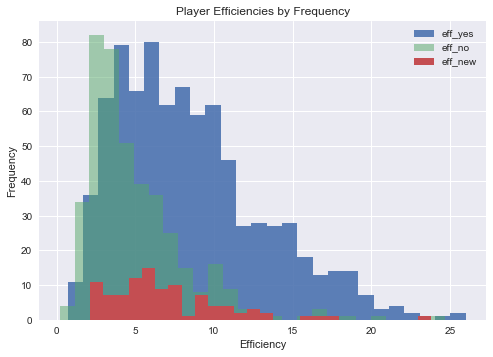

In [140]:
eff_yes = players_who_made_it['EFF'].plot(kind='hist', bins=26, alpha=0.9, label='eff_yes')
eff_no = players_who_did_not_make_it['EFF'].plot(kind='hist', bins=26, alpha=0.5, label='eff_no')

eff_new = potential_players['EFF'].plot(kind='hist', bins=26, label='eff_new')

plt.xlabel("Efficiency")
plt.title("Player Efficiencies by Frequency")

plt.legend(loc='upper right')

plt.show()

The compelling inference from the player efficiencies is that the players who played for at least five years have a much higher efficiency than those who didn't. Even though the group of players is twice as large, the right tail of players who played for five years is more heavily concentrated than the right tail of players who didn't. We can see that the players who did not play for five years have most of their efficiencies below the average of players who did play for five years (8.45).

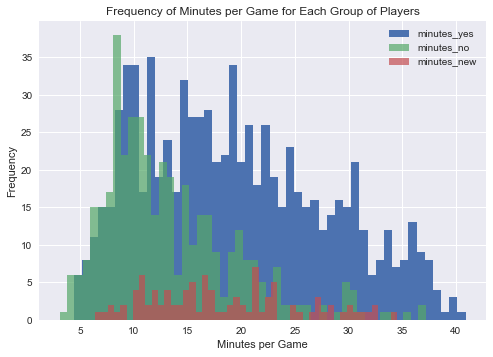

In [141]:
minutes_yes = players_who_made_it['MIN'].plot(kind='hist', bins=48, label='minutes_yes')
minutes_no = players_who_did_not_make_it['MIN'].plot(kind='hist', bins=48, alpha=0.7, label='minutes_no')

minutes_new = potential_players['MIN'].plot(kind='hist', bins=48, alpha = 0.7, label='minutes_new')

plt.xlabel("Minutes per Game")
plt.title("Frequency of Minutes per Game for Each Group of Players")

plt.legend(loc='upper right')

plt.show()

Minutes per game can be interpreted similarly to efficiency. There is a higher concentration of players with a higher minutes per game average in the right tail for players who have played for at least five years versus those who didn't. Players who did not play for five years saw less playing time on the basketball court, which could be correlated with their efficiency.

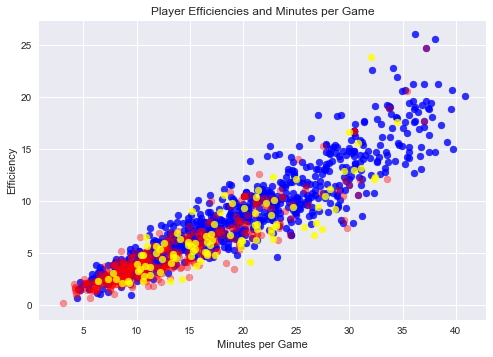

In [142]:
minutes_by_efficiency_yes = plt.scatter(players_who_made_it['MIN'], players_who_made_it['EFF'], color='blue', alpha=0.8)
minutes_by_efficiency_no = plt.scatter(players_who_did_not_make_it['MIN'], players_who_did_not_make_it['EFF'], color='red', alpha=0.4)
minutes_by_efficiency_new = plt.scatter(potential_players['MIN'], potential_players['EFF'], color='yellow', alpha=0.8)

plt.xlabel("Minutes per Game")
plt.ylabel("Efficiency")
plt.title("Player Efficiencies and Minutes per Game")

plt.show()

As expected, minutes per game is correlated with efficiency; more time spent on the court results in more opportunities to increase (or decrease) efficiency. It is safe to assume that players are on the court because they are more skilled and produce higher efficiency ratings for their team. Most of the players who did not play for five years (in red) fall to the lower-left of the scatter plot, fewer minutes per game and therefore lower efficiency.

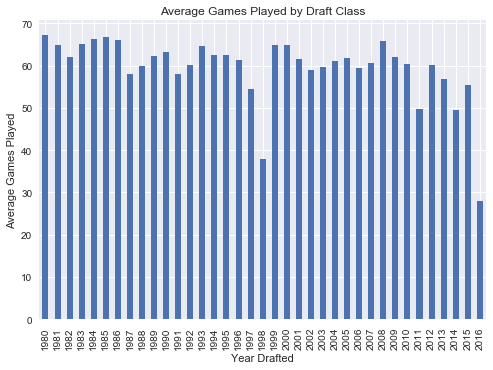

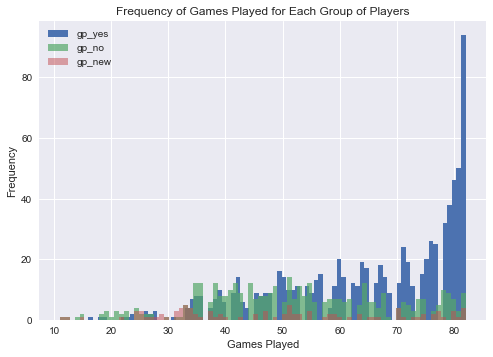

In [143]:
gp = by_year_avg['GP'].plot(kind='bar')
gp.set_ylabel("Average Games Played")
gp.set_title("Average Games Played by Draft Class")

plt.show()

gp_yes = players_who_made_it['GP'].plot(kind='hist', bins=82, label='gp_yes')
gp_no = players_who_did_not_make_it['GP'].plot(kind='hist', bins=82, alpha=0.7, label='gp_no')

gp_new = potential_players['GP'].plot(kind='hist', bins=82, alpha = 0.5, label='gp_new')

plt.xlabel("Games Played")
plt.title("Frequency of Games Played for Each Group of Players")

plt.legend(loc='upper left')

plt.show()

At fist glance, the averages of games played by draft class is lower from 1999 onwards compared to previous years. This may be a coincidence, but I believe it is due to the health and resting of players.

What is interesting here is that the number of players who played nearly the entire season is much higher for players who played for five years against those who did not. Health and talent are the two main areas to consider: did players play because they were healthy, or were they talented enough to play more games? Players who played for five years played 12 more games than players who did not play for five years, on average.

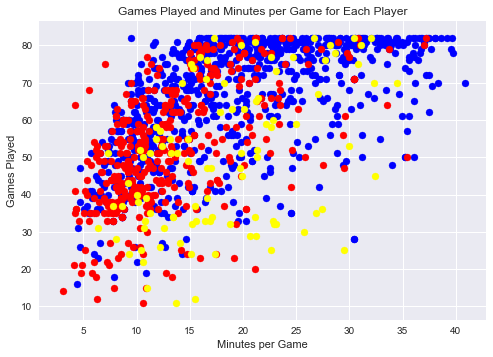

In [144]:
minutes_by_games_yes = plt.scatter(players_who_made_it['MIN'], players_who_made_it['GP'], color='blue')
minutes_by_games_no = plt.scatter(players_who_did_not_make_it['MIN'], players_who_did_not_make_it['GP'], color='red')
minutes_by_games_new = plt.scatter(potential_players['MIN'], potential_players['GP'], color='yellow')

plt.xlabel("Minutes per Game")
plt.ylabel("Games Played")
plt.title("Games Played and Minutes per Game for Each Player")

plt.show()

Here, we can see that players who played for at least five years played more games and minutes per game than those who did not based on the density of players.

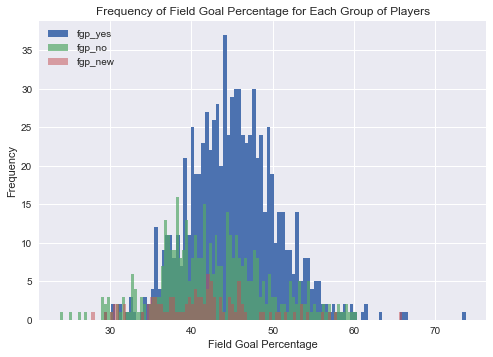

In [145]:
fgp_yes = players_who_made_it['FG%'].plot(kind='hist', bins=100, label='fgp_yes')
fgp_no = players_who_did_not_make_it['FG%'].plot(kind='hist', bins=100, alpha=0.7, label='fgp_no')

fgp_new = potential_players['FG%'].plot(kind='hist', bins=100, alpha = 0.5, label='fgp_new')

plt.xlabel("Field Goal Percentage")
plt.title("Frequency of Field Goal Percentage for Each Group of Players")

plt.legend(loc='upper left')

plt.show()

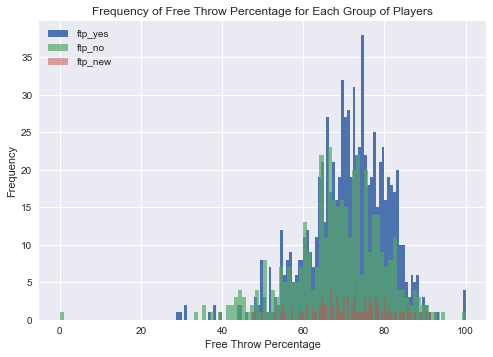

In [146]:
ftp_yes = players_who_made_it['FT%'].plot(kind='hist', bins=100, label='ftp_yes')
ftp_no = players_who_did_not_make_it['FT%'].plot(kind='hist', bins=100, alpha=0.7, label='ftp_no')

ftp_new = potential_players['FT%'].plot(kind='hist', bins=100, alpha = 0.5, label='ftp_new')

plt.xlabel("Free Throw Percentage")
plt.title("Frequency of Free Throw Percentage for Each Group of Players")

plt.legend(loc='upper left')

plt.show()

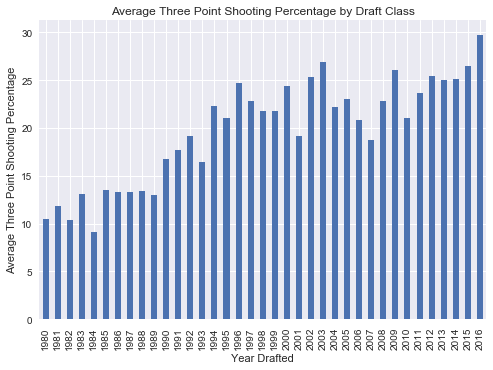

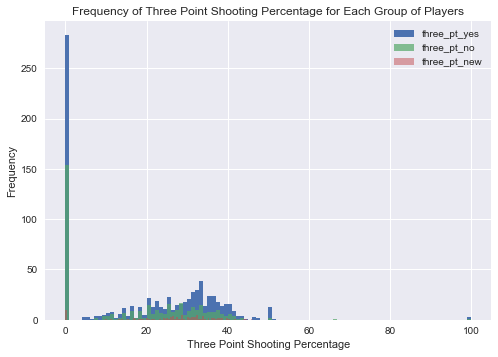

In [147]:
three_pt = by_year_avg['3P%'].plot(kind='bar')
three_pt.set_ylabel("Average Three Point Shooting Percentage")
three_pt.set_title("Average Three Point Shooting Percentage by Draft Class")

plt.show()

three_pt_yes = players_who_made_it['3P%'].plot(kind='hist', bins=100, label='three_pt_yes')
three_pt_no = players_who_did_not_make_it['3P%'].plot(kind='hist', bins=100, alpha=0.7, label='three_pt_no')

three_pt_new = potential_players['3P%'].plot(kind='hist', bins=100, alpha = 0.5, label='three_pt_new')

plt.xlabel("Three Point Shooting Percentage")
plt.title("Frequency of Three Point Shooting Percentage for Each Group of Players")

plt.legend(loc='upper right')

plt.show()

It's not as easy to identify the differences in field goal and free throw percentages between the players who did and did not play for five years. The differences among the two groups for field goal and free throw percentages are 2.4% and 2.8%, respectively. Although the differences may seem minor, players who have better shooting percentages on average will see more minutes played per game due to a better likelihood of scoring.

The biggest takeaway from the three point shooting percentage is that the average percentages are increasing since the beginning of the dataset. The three pointer is becoming more important in today's era of basketball, so players who have a higher three point shooting percentage will have a greater impact for their team. 

The high frequency of 0's for three point shooting percentage is due to the fact that many players are not shooters, so it is rare for them to shoot 3-pointers. It is likely that they did not make any of their few attempts or do not have a 3-point shooting percentage. It is still evident that three point shooters are important for any team's offensive strategy in order to spread and space the floor.

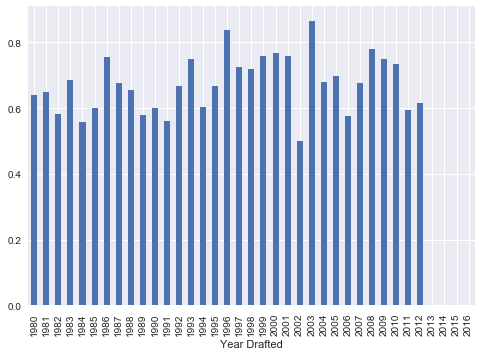

In [148]:
target = by_year_avg['TARGET_5Yrs'].plot(kind='bar')

plt.show()

This plot shows the percentage of players from each draft class who played for at least five years, the average of the 0's and 1's for each year. The 2003 draft class had the highest percentage of players who played for at least five years.

From the above analysis, there is a strong correlation between efficiency and playing for at least five years. Another interesting point is that minutes per game and games played are positively correlated with one another. This shows that players who are healthy enough to play in the NBA have a good chance of playing for at least five years while managing a heavy workload each game. Since these are all correlated with one another, we can conclude that efficiency is a result of time spent on the court due to the individual player's contributions and impact on the court.

Though it may seem trivial, players with a higher shooting percentage are more likely to play in the NBA longer. Because more shots are likely to go in, teams would want those players.  Shot selection makes up a good player's decision making ability.

The interesting trend here is that the average percentage of three point shooting has increased since 1980. Three pointers are becoming more immportant for team's offensive strategy in today's era of basketball. Three point shooters have a greater impact while on the court because opposing teams would not want to leave that player open on the perimeter, which opens up the inside of the court.

What about the underachieving players who did in fact play in the NBA for at least five years? Why were they able to make the cut as opposed to players who seem to have a lot of potential? 

The fact of the matter is, much of a player's impact on the court is not recorded in the stat sheet, such as various defensive and offensive responsibilities. 

On the contrary, there are players who outperformed their competition but did not play for five years. This could be a result of health and sturdiness. Unfortunately, some players had to cut their career short because their bodies could not sustain the workload or competition in the NBA. 

These are reasons to consider in the real-world, but from a data science standpoint we must assume that all of the stats are due to player performance, all else equal.

Now it's time to use this data and the differences between the players who did and did not play for five years to build a model that determines the younger players's future in the NBA. Using the older player's rookie stats for efficiency, games played, minutes per game, and shooting percentages, we can test the model on the stats of the younger players.